In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import argparse

In [42]:
df_2 = pd.read_csv("Data/Sugarscape 2 Constant Growback experiment-table.csv", skiprows=6)
df_3 = pd.read_csv("Data/Sugarscape 3 Wealth Distribution experiment-table.csv", skiprows=6)
df_4 = pd.read_csv("Data/Sugarscape3Ticks.csv", skiprows=6)

In [4]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24288 entries, 0 to 24287
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   [run number]        24288 non-null  int64  
 1   max-initial-vision  24288 non-null  int64  
 2   initial-population  24288 non-null  int64  
 3   [step]              24288 non-null  int64  
 4   gini-index          24288 non-null  float64
 5   survival-ratio      24288 non-null  float64
dtypes: float64(2), int64(4)
memory usage: 1.1 MB


In [29]:
df_4.columns

Index(['[run number]', 'max-initial-vision', 'initial-population', '[step]',
       'gini-index', 'survival-ratio'],
      dtype='object')

In [43]:
df2_list_pop = df_2['max-initial-vision'].unique()
df2_list_vision = df_2['initial-population'].unique()
df3_list_pop = df_3['max-initial-vision'].unique()
df3_list_vision = df_3['initial-population'].unique()
df4_list_pop = df_4['max-initial-vision'].unique()
df4_list_vision = df_4['initial-population'].unique()
df4_list_tick = df_4['[step]'].unique()

In [7]:
"""
cleaned_df2 = pd.DataFrame({
    'population': pd.Series(dtype='float64'),
    'max_vision': pd.Series(dtype='float64'),
    'Gini_index': pd.Series(dtype='float64'),
    'survival_ratio': pd.Series(dtype='float64')
})
"""

"\ncleaned_df2 = pd.DataFrame({\n    'population': pd.Series(dtype='float64'),\n    'max_vision': pd.Series(dtype='float64'),\n    'Gini_index': pd.Series(dtype='float64'),\n    'survival_ratio': pd.Series(dtype='float64')\n})\n"

In [8]:
lst2 = []
for i in df2_list_pop:
    for j in df2_list_vision:
        temp_df = df_2[(df_2['max-initial-vision'] == i) & (df_2['initial-population'] == j) & (df_2['[step]'] == 2000)]
        mean_gini = temp_df['gini-index'].mean()
        mean_survival = temp_df['survival-ratio'].mean()
        new_row = [i, j, mean_gini, mean_survival]
        lst2.append(new_row)
        

In [9]:
lst3 = []
for i in df3_list_pop:
    for j in df3_list_vision:
        temp_df = df_3[(df_3['max-initial-vision'] == i) & (df_3['initial-population'] == j) & (df_3['[step]'] == 2000)]
        mean_gini = temp_df['gini-index'].mean()
        mean_survival = temp_df['survival-ratio'].mean()
        new_row = [i, j, mean_gini, mean_survival]
        lst3.append(new_row)

In [32]:
lst4 = []
for i in df4_list_pop:
    for j in df4_list_vision:
        for n in df4_list_tick:
            temp_df = df_4[(df_4['max-initial-vision'] == i) & (df_4['initial-population'] == j) & (df_4['[step]'] == n)]
            mean_gini = temp_df['gini-index'].mean()
            mean_survival = temp_df['survival-ratio'].mean()
            new_row = [i, j, n, mean_gini, mean_survival]
            lst4.append(new_row)

In [44]:
cleaned_df2 = pd.DataFrame(lst2, columns=['population', 'max_vision', 'Gini_index', 'survival_ratio'])
cleaned_df3 = pd.DataFrame(lst3, columns=['population', 'max_vision', 'Gini_index', 'survival_ratio'])
cleaned_df4 = pd.DataFrame(lst4, columns=['population', 'max_vision', 'ticks', 'Gini_index', 'survival_ratio'])

In [47]:
ForConver = cleaned_df4[cleaned_df4['population'] == 6]

In [40]:
ForConver.sample(6)

,population,max_vision,ticks,Gini_index,survival_ratio
21719,6,720,80,0.493097,0.809028
21932,6,760,300,0.405380,0.625329
18838,6,140,1040,0.371601,0.933929
22702,6,900,1560,0.411941,0.385000
21551,6,680,760,0.431218,0.588235
22306,6,820,1720,0.406726,0.412195


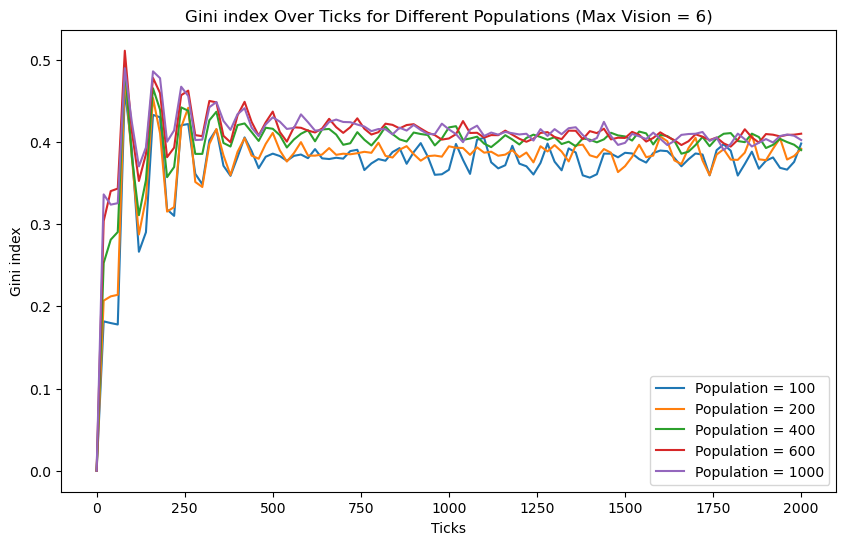

In [48]:
populations = [100, 200, 400, 600, 1000]

# 设置图表的大小
plt.figure(figsize=(10, 6))

# 遍历每个population值，绘制一条折线
for pop in populations:
    # 筛选出population列等于当前值的数据
    filtered_df = ForConver[ForConver['max_vision'] == pop]
    
    # 绘制折线图
    plt.plot(filtered_df['ticks'], filtered_df['Gini_index'], label=f'Population = {pop}')

# 添加图例
plt.legend()

# 添加标题和坐标轴标签
plt.title('Gini index Over Ticks for Different Populations (Max Vision = 6)')
plt.xlabel('Ticks')
plt.ylabel('Gini index')

# 显示图表
plt.show()

In [11]:
cleaned_df2.sample(5)

,population,max_vision,Gini_index,survival_ratio
437,11,560,0.346174,0.913393
237,7,240,0.252592,0.995833
133,4,920,0.305112,0.717120
120,4,660,0.320970,0.830682
53,3,240,0.241990,0.988542


In [12]:
cleaned_df3.sample(5)

,population,max_vision,Gini_index,survival_ratio
88,3,940,0.411072,0.313564
281,8,200,0.371352,0.903750
483,12,560,0.399019,0.628571
407,10,880,0.394284,0.400852
476,12,420,0.393139,0.788690


### Visualization

In [13]:
import plotly.graph_objects as go
import numpy as np
from scipy.interpolate import griddata



In [14]:

Y = cleaned_df2['population']
X = cleaned_df2['max_vision']
Z = cleaned_df2['Gini_index']
AI = cleaned_df2['survival_ratio']

# 假设X, Y, Z, 和 AI 是你已经有的数据

xi = np.linspace(X.min(), X.max(), 100)
yi = np.linspace(Y.min(), Y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# 对Z进行插值
zi = griddata((X, Y), Z, (xi, yi), method='cubic')

# 对AI进行插值，得到ai_mapped，这是根据xi和yi网格映射后的AI值
ai_mapped = griddata((X, Y), AI, (xi, yi), method='cubic')

colorscale = 'spectral'

# 用插值后的ai_mapped作为颜色映射
fig = go.Figure(data=[go.Surface(z=zi, x=xi, y=yi, surfacecolor=ai_mapped, colorscale=colorscale, cmin=0.2, cmax=1)],
                layout=go.Layout(
                    title='Correlation among population, max_vision, Gini_index and survival_ratio',
                    autosize=False,
                    width=1250, height=800,
                    margin=dict(l=30, r=30, b=70, t=40)
                ))

fig.update_layout(scene=dict(
                    xaxis=dict(autorange='reversed', title='population'),
                    yaxis_title='max_vision',
                    zaxis_title='Gini-index',
                    zaxis=dict(range=[0.15, 0.45]),
                    camera=dict(
                        up=dict(x=0, y=0, z=1),
                        center=dict(x=0, y=0, z=0),
                        eye=dict(x=2, y=2, z=0.01)
                    )))

fig.show()

In [15]:

Y = cleaned_df3['population']
X = cleaned_df3['max_vision']
Z = cleaned_df3['Gini_index']
AI = cleaned_df3['survival_ratio']

# 假设X, Y, Z, 和 AI 是你已经有的数据

xi = np.linspace(X.min(), X.max(), 100)
yi = np.linspace(Y.min(), Y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# 对Z进行插值
zi = griddata((X, Y), Z, (xi, yi), method='cubic')

# 对AI进行插值，得到ai_mapped，这是根据xi和yi网格映射后的AI值
ai_mapped = griddata((X, Y), AI, (xi, yi), method='cubic')

colorscale = 'spectral'

# 用插值后的ai_mapped作为颜色映射
fig = go.Figure(data=[go.Surface(z=zi, x=xi, y=yi, surfacecolor=ai_mapped, colorscale=colorscale, cmin=0.2, cmax=1)],
                layout=go.Layout(
                    title='Correlation among population, max_vision, Gini_index and survival_ratio',
                    autosize=False,
                    width=1250, height=800,
                    margin=dict(l=30, r=30, b=70, t=40)
                ))


fig.update_layout(scene=dict(
                    xaxis=dict(autorange='reversed', title='population'),
                    yaxis_title='max_vision',
                    zaxis_title='Gini-index',
                    zaxis=dict(range=[0.35, 0.45]),
                    camera=dict(
                        up=dict(x=0, y=0, z=1),
                        center=dict(x=0, y=0, z=0),
                        eye=dict(x=2, y=2, z=0.01)
                    )))

fig.show()

In [13]:
lst3 = []
for i in df3_list_pop:
    for j in df3_list_vision:
        temp_df = df_3[(df_3['max-initial-vision'] == i) & (df_3['initial-population'] == j) & (df_3['[step]'] == 200)]
        mean_gini = temp_df['gini-index'].mean()
        mean_survival = temp_df['survival-ratio'].mean()
        new_row = [i, j, mean_gini, mean_survival]
        lst3.append(new_row)

cleaned_df3 = pd.DataFrame(lst3, columns=['population', 'max_vision', 'Gini_index', 'survival_ratio'])


Y = cleaned_df3['population']
X = cleaned_df3['max_vision']
Z = cleaned_df3['Gini_index']
AI = cleaned_df3['survival_ratio']

# 假设X, Y, Z, 和 AI 是你已经有的数据

xi = np.linspace(X.min(), X.max(), 100)
yi = np.linspace(Y.min(), Y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# 对Z进行插值
zi = griddata((X, Y), Z, (xi, yi), method='cubic')

# 对AI进行插值，得到ai_mapped，这是根据xi和yi网格映射后的AI值
ai_mapped = griddata((X, Y), AI, (xi, yi), method='cubic')

colorscale = 'spectral'

# 用插值后的ai_mapped作为颜色映射
fig = go.Figure(data=[go.Surface(z=zi, x=xi, y=yi, surfacecolor=ai_mapped, colorscale=colorscale, cmin=0.2, cmax=1)],
                layout=go.Layout(
                    title='Correlation among population, max_vision, Gini_index and survival_ratio',
                    autosize=False,
                    width=1250, height=800,
                    margin=dict(l=30, r=30, b=70, t=40)
                ))


fig.update_layout(scene=dict(
                    xaxis=dict(autorange='reversed', title='population'),
                    yaxis_title='max_vision',
                    zaxis_title='Gini-index',
                    zaxis=dict(range=[0.25, 0.45]),
                    camera=dict(
                        up=dict(x=0, y=0, z=5),
                        center=dict(x=0, y=0, z=0),
                        eye=dict(x=2, y=0.8, z=0.8)
                    )))

fig.show()